<a href="https://colab.research.google.com/github/bidallei/MIAAD-UACJ/blob/main/Practica26_263150.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Práctica 26: Regresión Lasso y Ridge**
---

Alumno: Álvaro Hernandez Jarquín<br>
Seminario: Programación para analítica descriptiva y predictiva
---

### **Instrucciones y Objetivos para la Práctica: Regresión Lasso y Ridge**

#### **📌 Objetivos de la Práctica:**  
Al finalizar esta práctica, los estudiantes serán capaces de:  
1. **Realizar un Análisis Exploratorio de Datos (EDA)** completo, incluyendo visualización de distribuciones, detección de outliers y análisis de correlaciones.  
2. **Preprocesar datos** correctamente, manejando valores faltantes, codificando variables categóricas y escalando características.  
3. **Implementar modelos de regresión Lasso y Ridge**, entendiendo cómo la regularización afecta los coeficientes.  
4. **Verificar los supuestos de la regresión lineal** (linealidad, normalidad de residuos, homocedasticidad y multicolinealidad).  
5. **Comparar el rendimiento** de ambos modelos y analizar qué variables son más relevantes en cada caso.  

---


### **📋 Instrucciones**  




#### **🔹 Paso 1: Configuración Inicial**
✅ Carga el set de datos que puedes encontrar en el campus virtual
✅ Ejecutar las celdas de importación de librerías y carga del dataset.  
✅ Familiarizarse con los datos usando `.head()`, `.info()` y `.describe()`.

In [ ]:
# Carga el conjunto de datos insurance.csv en un dataframe.
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/ClassFiles/insurance.csv')
print("="*70)
print("Head")
print("="*70)
print(df.head())
print("="*70)
print("Info")
print("="*70)
print(df.info())
print("="*70)
print("Describe")
print("="*70)
print(df.describe())

Head
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None
Describe
               age          bmi     children       charges
count  1338.0


#### **🔹 Paso 2: Análisis Exploratorio (EDA)**  
📊 **Para variables numéricas:**  
- Generar histogramas y boxplots para identificar distribuciones y outliers.  
- Calcular medidas de tendencia central y dispersión.  

📊 **Para variables categóricas:**  
- Usar gráficos de barras para visualizar frecuencias.    

ANÁLISIS EXPLORATORIO DE DATOS (EDA)

🔍 ANÁLISIS DE VARIABLES NUMÉRICAS
----------------------------------------


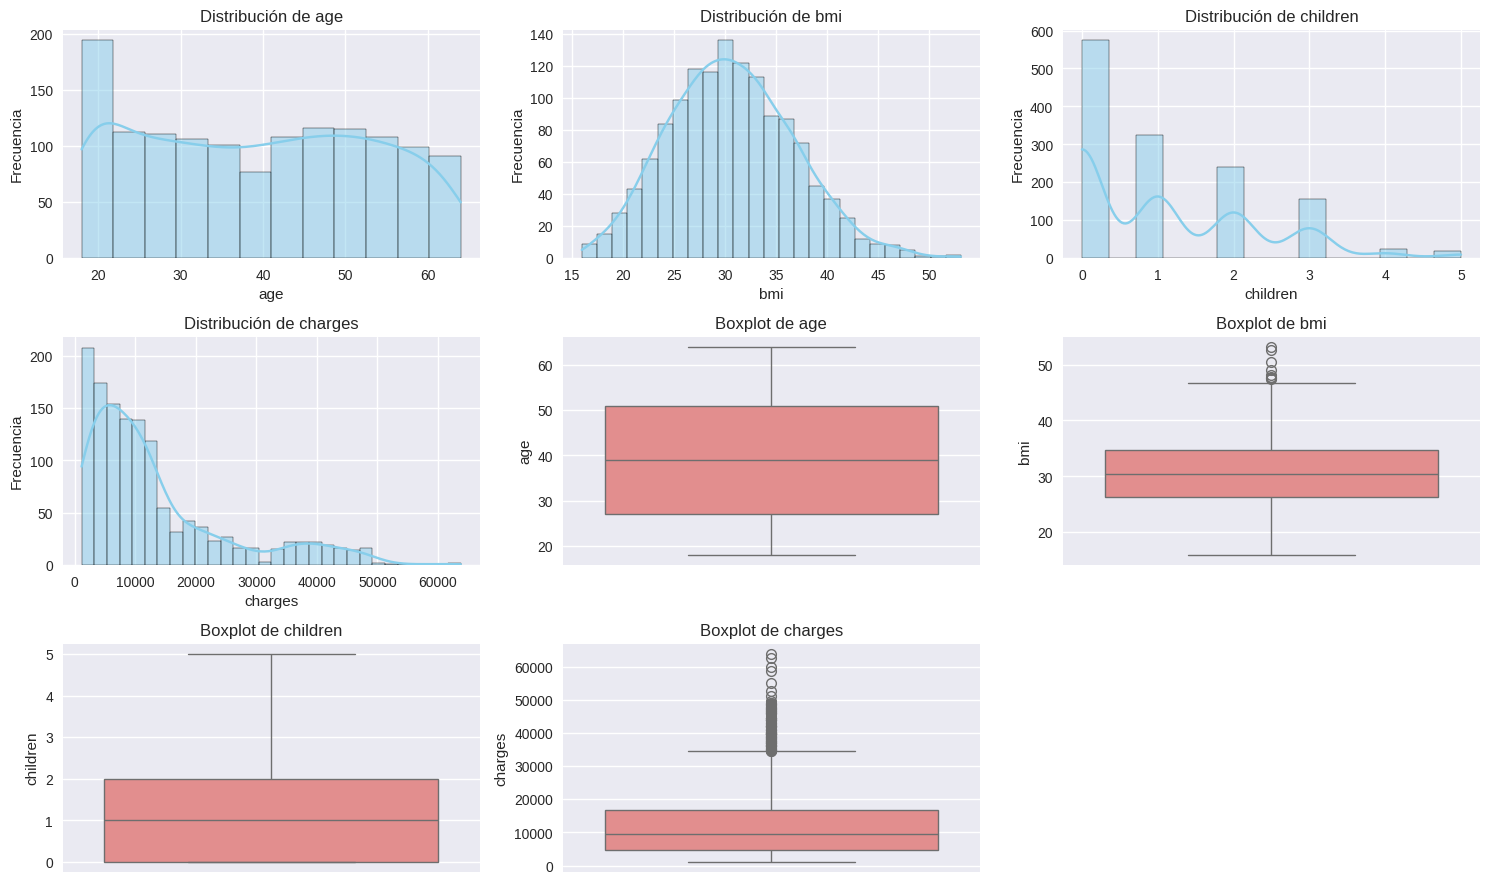


📊 ESTADÍSTICAS DESCRIPTIVAS DETALLADAS:
--------------------------------------------------

AGE:
  Media: 39.21
  Mediana: 39.00
  Desviación estándar: 14.05
  Rango: 18.00 - 64.00
  IQR: 24.00
  Outliers potenciales: 0 (0.0%)

BMI:
  Media: 30.66
  Mediana: 30.40
  Desviación estándar: 6.10
  Rango: 15.96 - 53.13
  IQR: 8.40
  Outliers potenciales: 9 (0.7%)

CHILDREN:
  Media: 1.09
  Mediana: 1.00
  Desviación estándar: 1.21
  Rango: 0.00 - 5.00
  IQR: 2.00
  Outliers potenciales: 0 (0.0%)

CHARGES:
  Media: 13270.42
  Mediana: 9382.03
  Desviación estándar: 12110.01
  Rango: 1121.87 - 63770.43
  IQR: 11899.63
  Outliers potenciales: 139 (10.4%)


🔍 ANÁLISIS DE VARIABLES CATEGÓRICAS
---------------------------------------------


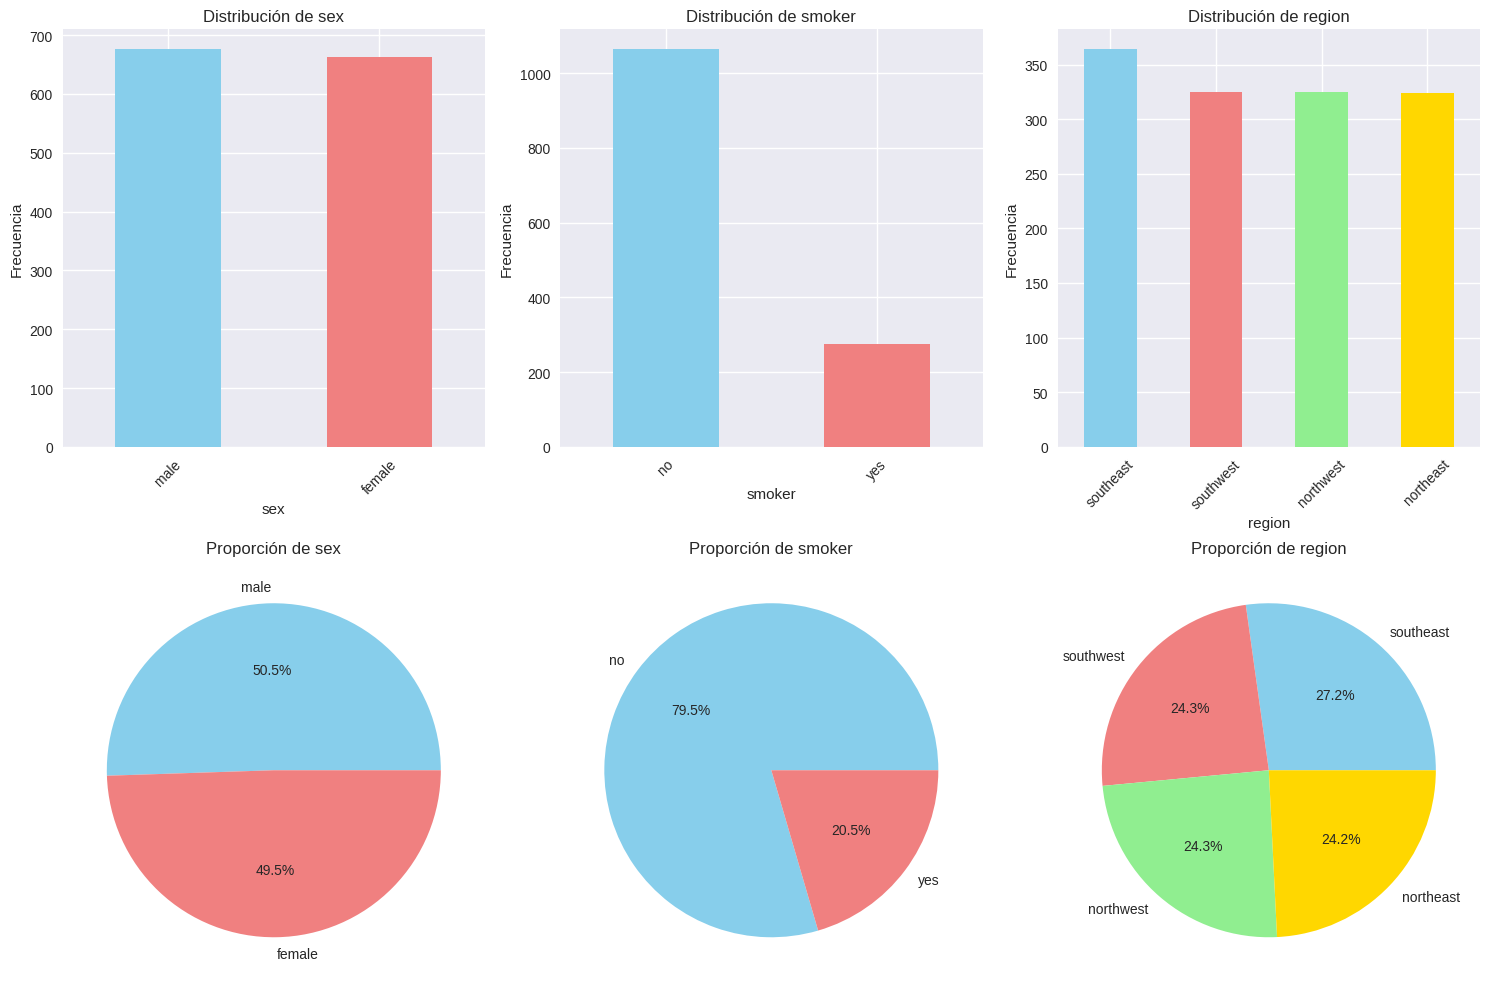


📈 ESTADÍSTICAS DE VARIABLES CATEGÓRICAS:
--------------------------------------------------

SEX:
  male: 676 (50.5%)
  female: 662 (49.5%)

SMOKER:
  no: 1064 (79.5%)
  yes: 274 (20.5%)

REGION:
  southeast: 364 (27.2%)
  southwest: 325 (24.3%)
  northwest: 325 (24.3%)
  northeast: 324 (24.2%)


📈 RELACIÓN CON COSTOS MÉDICOS (charges)
---------------------------------------------


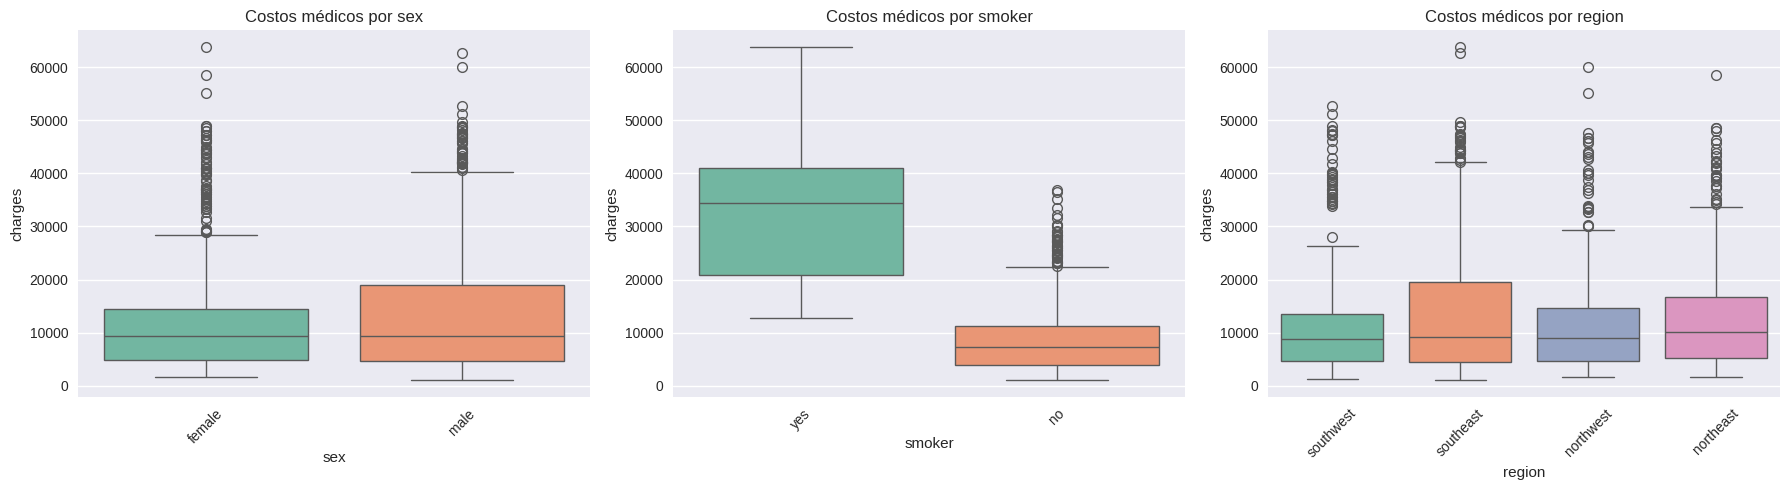

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

print("=" * 70)
print("ANÁLISIS EXPLORATORIO DE DATOS (EDA)")
print("=" * 70)

# Configuración de estilo para los gráficos
plt.style.use('seaborn-v0_8')
fig = plt.figure(figsize=(15, 12))

# ============================================================================
# 1. ANÁLISIS DE VARIABLES NUMÉRICAS
# ============================================================================

print("\n🔍 ANÁLISIS DE VARIABLES NUMÉRICAS")
print("-" * 40)

# Lista de variables numéricas
numeric_vars = ['age', 'bmi', 'children', 'charges']

# Histogramas y boxplots para variables numéricas
for i, var in enumerate(numeric_vars, 1):
    # Histograma
    plt.subplot(4, 3, i)
    sns.histplot(df[var], kde=True, color='skyblue')
    plt.title(f'Distribución de {var}')
    plt.xlabel(var)
    plt.ylabel('Frecuencia')

    # Boxplot
    plt.subplot(4, 3, i + 4)
    sns.boxplot(y=df[var], color='lightcoral')
    plt.title(f'Boxplot de {var}')
    plt.ylabel(var)

plt.tight_layout()
plt.show()

# Estadísticas descriptivas detalladas
print("\n📊 ESTADÍSTICAS DESCRIPTIVAS DETALLADAS:")
print("-" * 50)
for var in numeric_vars:
    print(f"\n{var.upper()}:")
    print(f"  Media: {df[var].mean():.2f}")
    print(f"  Mediana: {df[var].median():.2f}")
    print(f"  Desviación estándar: {df[var].std():.2f}")
    print(f"  Rango: {df[var].min():.2f} - {df[var].max():.2f}")
    print(f"  IQR: {df[var].quantile(0.75) - df[var].quantile(0.25):.2f}")

    # Detección de outliers usando método IQR
    Q1 = df[var].quantile(0.25)
    Q3 = df[var].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[var] < lower_bound) | (df[var] > upper_bound)]
    print(f"  Outliers potenciales: {len(outliers)} ({len(outliers)/len(df)*100:.1f}%)")

# ============================================================================
# 2. ANÁLISIS DE VARIABLES CATEGÓRICAS
# ============================================================================

print("\n\n🔍 ANÁLISIS DE VARIABLES CATEGÓRICAS")
print("-" * 45)

# Lista de variables categóricas
categorical_vars = ['sex', 'smoker', 'region']

# Gráficos de barras para variables categóricas
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

for i, var in enumerate(categorical_vars):
    # Gráfico de barras de frecuencias
    plt.subplot(2, 3, i + 1)
    df[var].value_counts().plot(kind='bar', color=['skyblue', 'lightcoral', 'lightgreen', 'gold'])
    plt.title(f'Distribución de {var}')
    plt.xlabel(var)
    plt.ylabel('Frecuencia')
    plt.xticks(rotation=45)

    # Porcentajes
    plt.subplot(2, 3, i + 4)
    counts = df[var].value_counts()
    plt.pie(counts.values, labels=counts.index, autopct='%1.1f%%',
            colors=['skyblue', 'lightcoral', 'lightgreen', 'gold'])
    plt.title(f'Proporción de {var}')

plt.tight_layout()
plt.show()

# Estadísticas de variables categóricas
print("\n📈 ESTADÍSTICAS DE VARIABLES CATEGÓRICAS:")
print("-" * 50)
for var in categorical_vars:
    print(f"\n{var.upper()}:")
    value_counts = df[var].value_counts()
    for category, count in value_counts.items():
        percentage = (count / len(df)) * 100
        print(f"  {category}: {count} ({percentage:.1f}%)")

# ============================================================================
# 3. ANÁLISIS DE RELACIÓN CON LA VARIABLE OBJETIVO (charges)
# ============================================================================

print("\n\n📈 RELACIÓN CON COSTOS MÉDICOS (charges)")
print("-" * 45)

# Boxplots de charges por categorías - CORREGIDO
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, var in enumerate(categorical_vars):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(data=df, x=var, y='charges', hue=var, palette='Set2', legend=False)
    plt.title(f'Costos médicos por {var}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

#### **🔹 Paso 3: Matriz de Correlación**  
✅ Calcular la matriz de correlación **solo para variables numéricas**.  
✅ Generar un **mapa de calor** para visualizar relaciones.  

MATRIZ DE CORRELACIÓN - VARIABLES NUMÉRICAS

📊 MATRIZ DE CORRELACIÓN:
----------------------------------------
            age    bmi  children  charges
age       1.000  0.109     0.042    0.299
bmi       0.109  1.000     0.013    0.198
children  0.042  0.013     1.000    0.068
charges   0.299  0.198     0.068    1.000


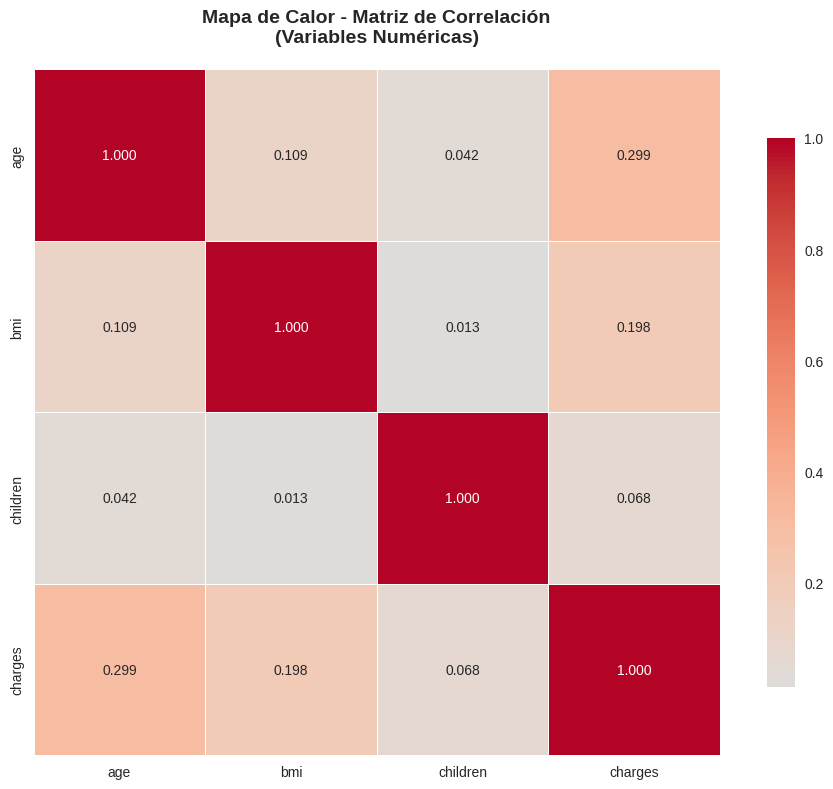


🔍 ANÁLISIS DE CORRELACIÓN CON 'CHARGES'
---------------------------------------------

Correlaciones con 'charges' (ordenadas):
  age: 0.299
  bmi: 0.198
  children: 0.068

📈 INTERPRETACIÓN:
------------------------------

Clasificación de correlaciones con 'charges':
  age: MUY DÉBIL correlación positiva (0.299)
  bmi: MUY DÉBIL correlación positiva (0.198)
  children: MUY DÉBIL correlación positiva (0.068)


📊 GRÁFICOS DE DISPERSIÓN CON 'CHARGES'
---------------------------------------------


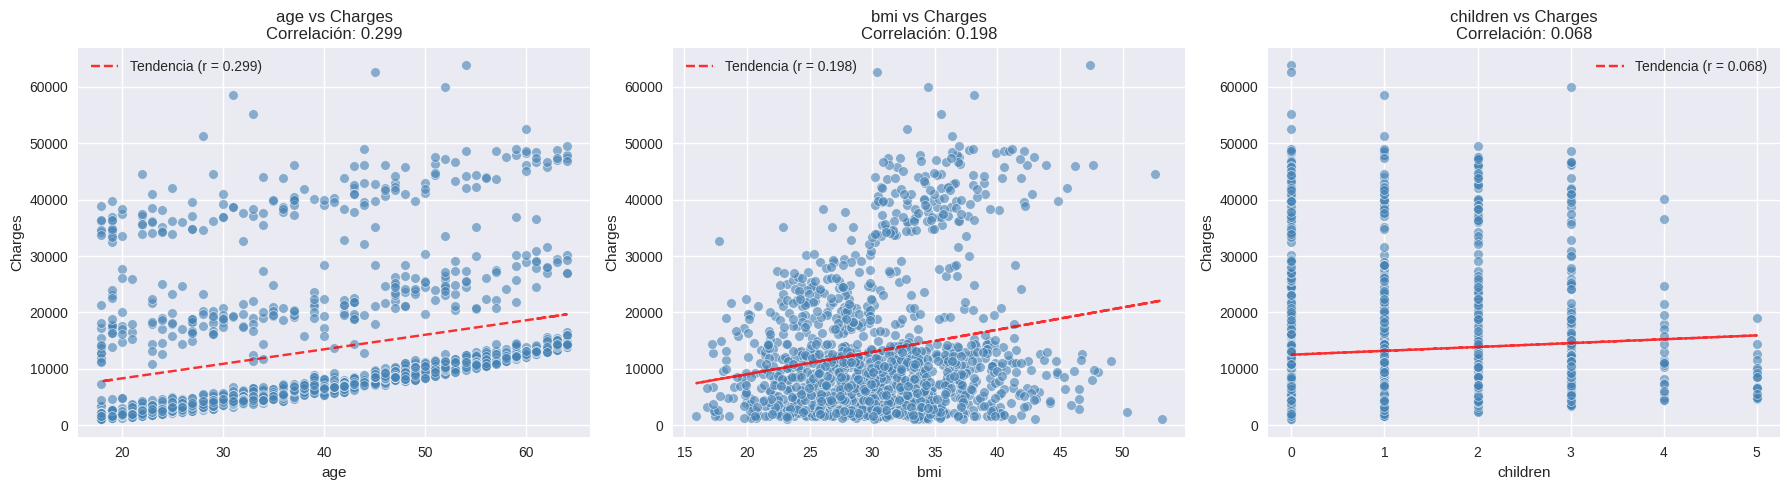


RESUMEN EJECUTIVO - MATRIZ DE CORRELACIÓN

🎯 **VARIABLE MÁS CORRELACIONADA CON 'CHARGES':**
  'age' con correlación: 0.299

📋 **ORDEN DE IMPORTANCIA (correlación con charges):**
  1. age: 0.299
  2. bmi: 0.198
  3. children: 0.068


In [ ]:
print("=" * 70)
print("MATRIZ DE CORRELACIÓN - VARIABLES NUMÉRICAS")
print("=" * 70)

# ============================================================================
# 1. Cálculo de la matriz de correlación
# ============================================================================

# Seleccionar solo variables numéricas
numeric_df = df[['age', 'bmi', 'children', 'charges']]

# Calcular matriz de correlación
correlation_matrix = numeric_df.corr()

print("\n📊 MATRIZ DE CORRELACIÓN:")
print("-" * 40)
print(correlation_matrix.round(3))

# ============================================================================
# 2. Mapa de calor de correlaciones
# ============================================================================

plt.figure(figsize=(10, 8))

# Crear mapa de calor con anotaciones
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))  # Máscara para el triángulo superior

sns.heatmap(correlation_matrix,
            annot=True,
            cmap='coolwarm',
            center=0,
            square=True,
            linewidths=0.5,
            fmt='.3f',
            cbar_kws={'shrink': 0.8})

plt.title('Mapa de Calor - Matriz de Correlación\n(Variables Numéricas)',
          fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# ============================================================================
# 3. Análisis de correlación con la variable objetivo (charges)
# ============================================================================

print("\n🔍 ANÁLISIS DE CORRELACIÓN CON 'CHARGES'")
print("-" * 45)

# Ordenar correlaciones con charges de mayor a menor
charges_correlations = correlation_matrix['charges'].sort_values(ascending=False)

print("\nCorrelaciones con 'charges' (ordenadas):")
for variable, correlation in charges_correlations.items():
    if variable != 'charges':  # Excluir la correlación consigo misma
        print(f"  {variable}: {correlation:.3f}")

# ============================================================================
# 4. Interpretación y conclusiones
# ============================================================================

print("\n📈 INTERPRETACIÓN:")
print("-" * 30)

# Definir criterios de fuerza de correlación
strong_threshold = 0.7
moderate_threshold = 0.5
weak_threshold = 0.3

print("\nClasificación de correlaciones con 'charges':")
for variable, correlation in charges_correlations.items():
    if variable != 'charges':
        if abs(correlation) >= strong_threshold:
            strength = "FUERTE"
        elif abs(correlation) >= moderate_threshold:
            strength = "MODERADA"
        elif abs(correlation) >= weak_threshold:
            strength = "DÉBIL"
        else:
            strength = "MUY DÉBIL"

        direction = "positiva" if correlation > 0 else "negativa"
        print(f"  {variable}: {strength} correlación {direction} ({correlation:.3f})")

# ============================================================================
# 5. Visualización adicional: scatter plots con la variable objetivo
# ============================================================================

print("\n\n📊 GRÁFICOS DE DISPERSIÓN CON 'CHARGES'")
print("-" * 45)

# Crear scatter plots para cada variable numérica vs charges
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

variables_to_plot = ['age', 'bmi', 'children']

for i, var in enumerate(variables_to_plot):
    plt.subplot(1, 3, i + 1)
    sns.scatterplot(data=df, x=var, y='charges', alpha=0.6, color='steelblue')

    # Añadir línea de tendencia
    z = np.polyfit(df[var], df['charges'], 1)
    p = np.poly1d(z)
    plt.plot(df[var], p(df[var]), "r--", alpha=0.8,
             label=f'Tendencia (r = {correlation_matrix.loc[var, "charges"]:.3f})')

    plt.title(f'{var} vs Charges\nCorrelación: {correlation_matrix.loc[var, "charges"]:.3f}')
    plt.xlabel(var)
    plt.ylabel('Charges')
    plt.legend()

plt.tight_layout()
plt.show()

# ============================================================================
# 6. Resumen ejecutivo
# ============================================================================

print("\n" + "=" * 70)
print("RESUMEN EJECUTIVO - MATRIZ DE CORRELACIÓN")
print("=" * 70)

print(f"\n🎯 **VARIABLE MÁS CORRELACIONADA CON 'CHARGES':**")
most_correlated = charges_correlations.index[1]  # Index 0 es 'charges' misma
most_corr_value = charges_correlations.iloc[1]
print(f"  '{most_correlated}' con correlación: {most_corr_value:.3f}")

print(f"\n📋 **ORDEN DE IMPORTANCIA (correlación con charges):**")
for i, (variable, correlation) in enumerate(charges_correlations.items()):
    if variable != 'charges':
        print(f"  {i}. {variable}: {correlation:.3f}")


📌 **Pregunta:** ¿Qué variables están más correlacionadas con el target (`charges`)?  



#### **🔹 Paso 4: Preprocesamiento**  
🔧 **Tareas:**  
1. Manejar valores faltantes con `SimpleImputer`.  
2. Codificar variables categóricas con `OneHotEncoder`.  
3. Estandarizar variables numéricas con `StandardScaler`.  
✅ Verificar que el dataset transformado no tenga valores nulos.  



In [ ]:
print("=" * 70)
print("PREPROCESAMIENTO DE DATOS")
print("=" * 70)

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import pandas as pd
import numpy as np

# ============================================================================
# 1. Verificación inicial de valores nulos
# ============================================================================

print("\n🔍 VERIFICACIÓN INICIAL DE VALORES NULOS")
print("-" * 45)

print("Valores nulos por columna:")
print(df.isnull().sum())

print(f"\nTotal de valores nulos en el dataset: {df.isnull().sum().sum()}")

# ============================================================================
# 2. Definición de variables por tipo
# ============================================================================

# Separar variables por tipo
numeric_features = ['age', 'bmi', 'children']
categorical_features = ['sex', 'smoker', 'region']
target_feature = 'charges'

print(f"\n📋 CLASIFICACIÓN DE VARIABLES:")
print(f"  Numéricas: {numeric_features}")
print(f"  Categóricas: {categorical_features}")
print(f"  Target: {target_feature}")

# ============================================================================
# 3. Creación del pipeline de preprocesamiento
# ============================================================================

print("\n🔧 CREANDO PIPELINE DE PREPROCESAMIENTO...")
print("-" * 45)

# Preprocesador para variables numéricas
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),  # Manejo de valores faltantes
    ('scaler', StandardScaler())  # Estandarización
])

# Preprocesador para variables categóricas
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Manejo de valores faltantes
    ('onehot', OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'))  # One-hot encoding
])

# Combinar transformadores
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

print("✅ Pipeline creado exitosamente")

# ============================================================================
# 4. Aplicar el preprocesamiento
# ============================================================================

print("\n🔄 APLICANDO PREPROCESAMIENTO...")
print("-" * 35)

# Separar features y target
X = df.drop(columns=[target_feature])
y = df[target_feature]

print(f"Dimensiones originales - X: {X.shape}, y: {y.shape}")

# Aplicar transformación
X_processed = preprocessor.fit_transform(X)

# ============================================================================
# 5. Crear DataFrame con los datos procesados
# ============================================================================

print("\n📊 CREANDO DATAFRAME PROCESADO...")
print("-" * 40)

# Obtener nombres de columnas después del one-hot encoding
cat_encoder = preprocessor.named_transformers_['cat'].named_steps['onehot']
categorical_feature_names = cat_encoder.get_feature_names_out(categorical_features)

# Combinar todos los nombres de características
feature_names = numeric_features + list(categorical_feature_names)

# Crear DataFrame procesado
X_processed_df = pd.DataFrame(X_processed, columns=feature_names)

print("Nombres de características después del preprocesamiento:")
for i, feature in enumerate(feature_names):
    print(f"  {i+1}. {feature}")

print(f"\nDimensiones después del preprocesamiento - X_processed: {X_processed_df.shape}")

# ============================================================================
# 6. Verificación final de valores nulos
# ============================================================================

print("\n✅ VERIFICACIÓN FINAL DE CALIDAD DE DATOS")
print("-" * 45)

print("Valores nulos en el dataset procesado:")
print(X_processed_df.isnull().sum())

print(f"\nTotal de valores nulos después del preprocesamiento: {X_processed_df.isnull().sum().sum()}")

# Verificar tipos de datos
print(f"\nTipos de datos en el dataset procesado:")
print(X_processed_df.dtypes.value_counts())

# ============================================================================
# 7. Información estadística del dataset procesado
# ============================================================================

print("\n📈 ESTADÍSTICAS DEL DATASET PROCESADO")
print("-" * 45)

print("\nEstadísticas descriptivas - Variables numéricas estandarizadas:")
print(X_processed_df[numeric_features].describe().round(3))

print("\nDistribución de variables categóricas codificadas:")
for cat_feature in categorical_feature_names:
    if X_processed_df[cat_feature].nunique() <= 2:  # Para variables one-hot
        print(f"\n{cat_feature}:")
        print(f"  Valores 1: {X_processed_df[cat_feature].sum()} ({X_processed_df[cat_feature].mean()*100:.1f}%)")
        print(f"  Valores 0: {len(X_processed_df) - X_processed_df[cat_feature].sum()} ({(1 - X_processed_df[cat_feature].mean())*100:.1f}%)")

# ============================================================================
# 8. Resumen del preprocesamiento aplicado
# ============================================================================

print("\n" + "=" * 70)
print("RESUMEN DEL PREPROCESAMIENTO APLICADO")
print("=" * 70)

print(f"\n🔧 **TRANSFORMACIONES APLICADAS:**")
print("  1. ✅ Variables numéricas:")
print("     - Imputación de valores faltantes: Strategy='median'")
print("     - Estandarización: StandardScaler (media=0, std=1)")

print("\n  2. ✅ Variables categóricas:")
print("     - Imputación de valores faltantes: Strategy='most_frequent'")
print("     - Codificación: OneHotEncoder (drop='first')")

print(f"\n📊 **RESULTADO FINAL:**")
print(f"  • Dataset original: {X.shape[1]} features")
print(f"  • Dataset procesado: {X_processed_df.shape[1]} features")
print(f"  • Valores nulos: {X_processed_df.isnull().sum().sum()}")
print(f"  • Filas conservadas: {X_processed_df.shape[0]}")

print(f"\n🎯 **VARIABLES CREADAS:**")
print(f"  • X_processed_df: DataFrame con features preprocesados")
print(f"  • y: Variable target original")

PREPROCESAMIENTO DE DATOS

🔍 VERIFICACIÓN INICIAL DE VALORES NULOS
---------------------------------------------
Valores nulos por columna:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Total de valores nulos en el dataset: 0

📋 CLASIFICACIÓN DE VARIABLES:
  Numéricas: ['age', 'bmi', 'children']
  Categóricas: ['sex', 'smoker', 'region']
  Target: charges

🔧 CREANDO PIPELINE DE PREPROCESAMIENTO...
---------------------------------------------
✅ Pipeline creado exitosamente

🔄 APLICANDO PREPROCESAMIENTO...
-----------------------------------
Dimensiones originales - X: (1338, 6), y: (1338,)

📊 CREANDO DATAFRAME PROCESADO...
----------------------------------------
Nombres de características después del preprocesamiento:
  1. age
  2. bmi
  3. children
  4. sex_male
  5. smoker_yes
  6. region_northwest
  7. region_southeast
  8. region_southwest

Dimensiones después del preprocesamiento - X_processed: (1338, 8)

✅ VERIFIC

#### **🔹 Paso 5: Modelado (Lasso y Ridge)**  
🎯 **Para cada modelo:**  
1. Ajustar el modelo con los hiperparámetros dados (`alpha=0.1` para Lasso, `alpha=1.0` para Ridge).  
2. Calcular **MSE** y **R²** para evaluar rendimiento.  
3. Analizar los coeficientes para identificar variables importantes.  

📌 **Pregunta:**  
- ¿Qué modelo tiene un mejor R²? ¿Por qué crees que ocurre esto?  
- ¿Qué variables tienen coeficientes cercanos a cero en Lasso? ¿Por qué?  



In [ ]:
print("=" * 70)
print("MODELADO: REGRESIÓN LASSO Y RIDGE")
print("=" * 70)

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# ============================================================================
# 1. División Train-Test
# ============================================================================

print("\n📊 DIVISIÓN TRAIN-TEST")
print("-" * 30)

X_train, X_test, y_train, y_test = train_test_split(
    X_processed_df, y, test_size=0.2, random_state=42
)

print(f"Conjunto de entrenamiento: {X_train.shape}")
print(f"Conjunto de prueba: {X_test.shape}")
print(f"Proporción train/test: {X_train.shape[0]}/{X_test.shape[0]} ({(X_train.shape[0]/len(X_processed_df)*100):.1f}%/{(X_test.shape[0]/len(X_processed_df)*100):.1f}%)")

# ============================================================================
# 2. Modelo Lasso Regression (alpha=0.1)
# ============================================================================

print("\n🔵 MODELO LASSO REGRESSION (alpha=0.1)")
print("-" * 45)

# Crear y entrenar modelo Lasso
lasso_model = Lasso(alpha=0.1, random_state=42)
lasso_model.fit(X_train, y_train)

# Predicciones
y_pred_lasso = lasso_model.predict(X_test)

# Métricas de evaluación
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print(f"✅ Lasso entrenado exitosamente")
print(f"📊 Métricas de evaluación:")
print(f"   • MSE: {mse_lasso:,.2f}")
print(f"   • R²: {r2_lasso:.4f}")

# Análisis de coeficientes Lasso
print(f"\n🔍 ANÁLISIS DE COEFICIENTES LASSO:")
print("-" * 35)

lasso_coef_df = pd.DataFrame({
    'Variable': X_processed_df.columns,
    'Coeficiente': lasso_model.coef_,
    'Abs_Coefficient': np.abs(lasso_model.coef_)
}).sort_values('Abs_Coefficient', ascending=False)

print(lasso_coef_df.round(4))

# Variables con coeficientes cercanos a cero
near_zero_threshold = 0.01
near_zero_vars = lasso_coef_df[np.abs(lasso_coef_df['Coeficiente']) < near_zero_threshold]

print(f"\n🎯 VARIABLES CON COEFICIENTES CERCA DE CERO (< {near_zero_threshold}):")
if len(near_zero_vars) > 0:
    for _, row in near_zero_vars.iterrows():
        print(f"   • {row['Variable']}: {row['Coeficiente']:.6f}")
else:
    print("   • Ninguna variable con coeficiente cercano a cero")

# ============================================================================
# 3. Modelo Ridge Regression (alpha=1.0)
# ============================================================================

print("\n🔴 MODELO RIDGE REGRESSION (alpha=1.0)")
print("-" * 45)

# Crear y entrenar modelo Ridge
ridge_model = Ridge(alpha=1.0, random_state=42)
ridge_model.fit(X_train, y_train)

# Predicciones
y_pred_ridge = ridge_model.predict(X_test)

# Métricas de evaluación
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f"✅ Ridge entrenado exitosamente")
print(f"📊 Métricas de evaluación:")
print(f"   • MSE: {mse_ridge:,.2f}")
print(f"   • R²: {r2_ridge:.4f}")

# Análisis de coeficientes Ridge
print(f"\n🔍 ANÁLISIS DE COEFICIENTES RIDGE:")
print("-" * 35)

ridge_coef_df = pd.DataFrame({
    'Variable': X_processed_df.columns,
    'Coeficiente': ridge_model.coef_,
    'Abs_Coefficient': np.abs(ridge_model.coef_)
}).sort_values('Abs_Coefficient', ascending=False)

print(ridge_coef_df.round(4))

# ============================================================================
# 4. Comparación de Modelos
# ============================================================================

print("\n" + "=" * 70)
print("COMPARACIÓN DE MODELOS")
print("=" * 70)

# Crear DataFrame comparativo
comparison_df = pd.DataFrame({
    'Métrica': ['MSE', 'R²'],
    'Lasso': [mse_lasso, r2_lasso],
    'Ridge': [mse_ridge, r2_ridge]
})

print("\n📈 COMPARACIÓN DE RENDIMIENTO:")
print(comparison_df.round(4))

# Determinar mejor modelo
better_model = "Lasso" if r2_lasso > r2_ridge else "Ridge"
better_r2 = max(r2_lasso, r2_ridge)

print(f"\n🎯 MEJOR MODELO: {better_model} (R² = {better_r2:.4f})")

# ============================================================================
# 5. Análisis Comparativo de Coeficientes
# ============================================================================

print(f"\n🔍 COMPARACIÓN DE COEFICIENTES:")
print("-" * 35)

# Combinar coeficientes de ambos modelos
coef_comparison = pd.DataFrame({
    'Variable': X_processed_df.columns,
    'Lasso_Coefficient': lasso_model.coef_,
    'Ridge_Coefficient': ridge_model.coef_,
    'Diferencia': np.abs(lasso_model.coef_ - ridge_model.coef_)
}).sort_values('Diferencia', ascending=False)

print("Coeficientes comparativos (primeras 5 variables con mayor diferencia):")
print(coef_comparison.head().round(4))

# ============================================================================
# 6. Interpretación y Respuestas a las Preguntas
# ============================================================================

print("\n" + "=" * 70)
print("INTERPRETACIÓN Y RESPUESTAS")
print("=" * 70)

print(f"\n📌 RESPUESTA A LAS PREGUNTAS:")

print(f"\n1. ¿Qué modelo tiene un mejor R²? ¿Por qué crees que ocurre esto?")
print(f"   • Mejor R²: {better_model} ({better_r2:.4f})")
if better_model == "Lasso":
    print(f"   • Posible razón: Lasso puede estar realizando selección de variables,")
    print(f"     eliminando features menos importantes y reduciendo el overfitting.")
else:
    print(f"   • Posible razón: Ridge preserva todas las variables pero las penaliza,")
    print(f"     lo que puede funcionar mejor cuando todas las features son relevantes.")

print(f"\n2. ¿Qué variables tienen coeficientes cercanos a cero en Lasso? ¿Por qué?")
print(f"   • Variables con coeficientes < {near_zero_threshold}:")
if len(near_zero_vars) > 0:
    for _, row in near_zero_vars.iterrows():
        print(f"     - {row['Variable']}: {row['Coeficiente']:.6f}")
    print(f"   • Razón: Lasso realiza selección de variables (L1 regularization)")
    print(f"     forzando coeficientes irrelevantes a cero automáticamente.")
else:
    print(f"     - Ninguna variable fue forzada a cero con alpha=0.1")
    print(f"   • Razón: El valor de alpha puede ser muy bajo para forzar coeficientes a cero")

print(f"\n💡 OBSERVACIONES ADICIONALES:")
print(f"   • Número de features: {X_processed_df.shape[1]}")
print(f"   • Tamaño del conjunto de entrenamiento: {X_train.shape[0]} muestras")
print(f"   • Variables más importantes según Lasso: {lasso_coef_df.iloc[0]['Variable']}")
print(f"   • Variables más importantes según Ridge: {ridge_coef_df.iloc[0]['Variable']}")

MODELADO: REGRESIÓN LASSO Y RIDGE

📊 DIVISIÓN TRAIN-TEST
------------------------------
Conjunto de entrenamiento: (1070, 8)
Conjunto de prueba: (268, 8)
Proporción train/test: 1070/268 (80.0%/20.0%)

🔵 MODELO LASSO REGRESSION (alpha=0.1)
---------------------------------------------
✅ Lasso entrenado exitosamente
📊 Métricas de evaluación:
   • MSE: 33,597,788.88
   • R²: 0.7836

🔍 ANÁLISIS DE COEFICIENTES LASSO:
-----------------------------------
           Variable  Coeficiente  Abs_Coefficient
4        smoker_yes   23650.4805       23650.4805
0               age    3609.0557        3609.0557
1               bmi    2054.6673        2054.6673
7  region_southwest    -808.1292         808.1292
6  region_southeast    -656.1080         656.1080
2          children     512.3829         512.3829
5  region_northwest    -369.0427         369.0427
3          sex_male     -18.1370          18.1370

🎯 VARIABLES CON COEFICIENTES CERCA DE CERO (< 0.01):
   • Ninguna variable con coeficiente cerca

#### **🔹 Paso 6: Verificación de Supuestos**  
📉 **Para cada modelo, verificar:**  
1. **Linealidad** (gráfico de residuos vs predicciones).  
2. **Normalidad de residuos** (QQ-Plot y test de Shapiro-Wilk).  
3. **Homocedasticidad** (test de Breusch-Pagan).  
4. **Multicolinealidad** (VIF > 10 indica problema).  

📌 **Pregunta:**  
- ¿Se cumplen los supuestos en ambos modelos?  
- Si hay heterocedasticidad, ¿cómo podría solucionarse?  



VERIFICACIÓN DE SUPUESTOS DE REGRESIÓN

📊 CALCULANDO RESIDUOS Y PREDICCIONES...
---------------------------------------------

🔵 VERIFICACIÓN DE SUPUESTOS - MODELO LASSO


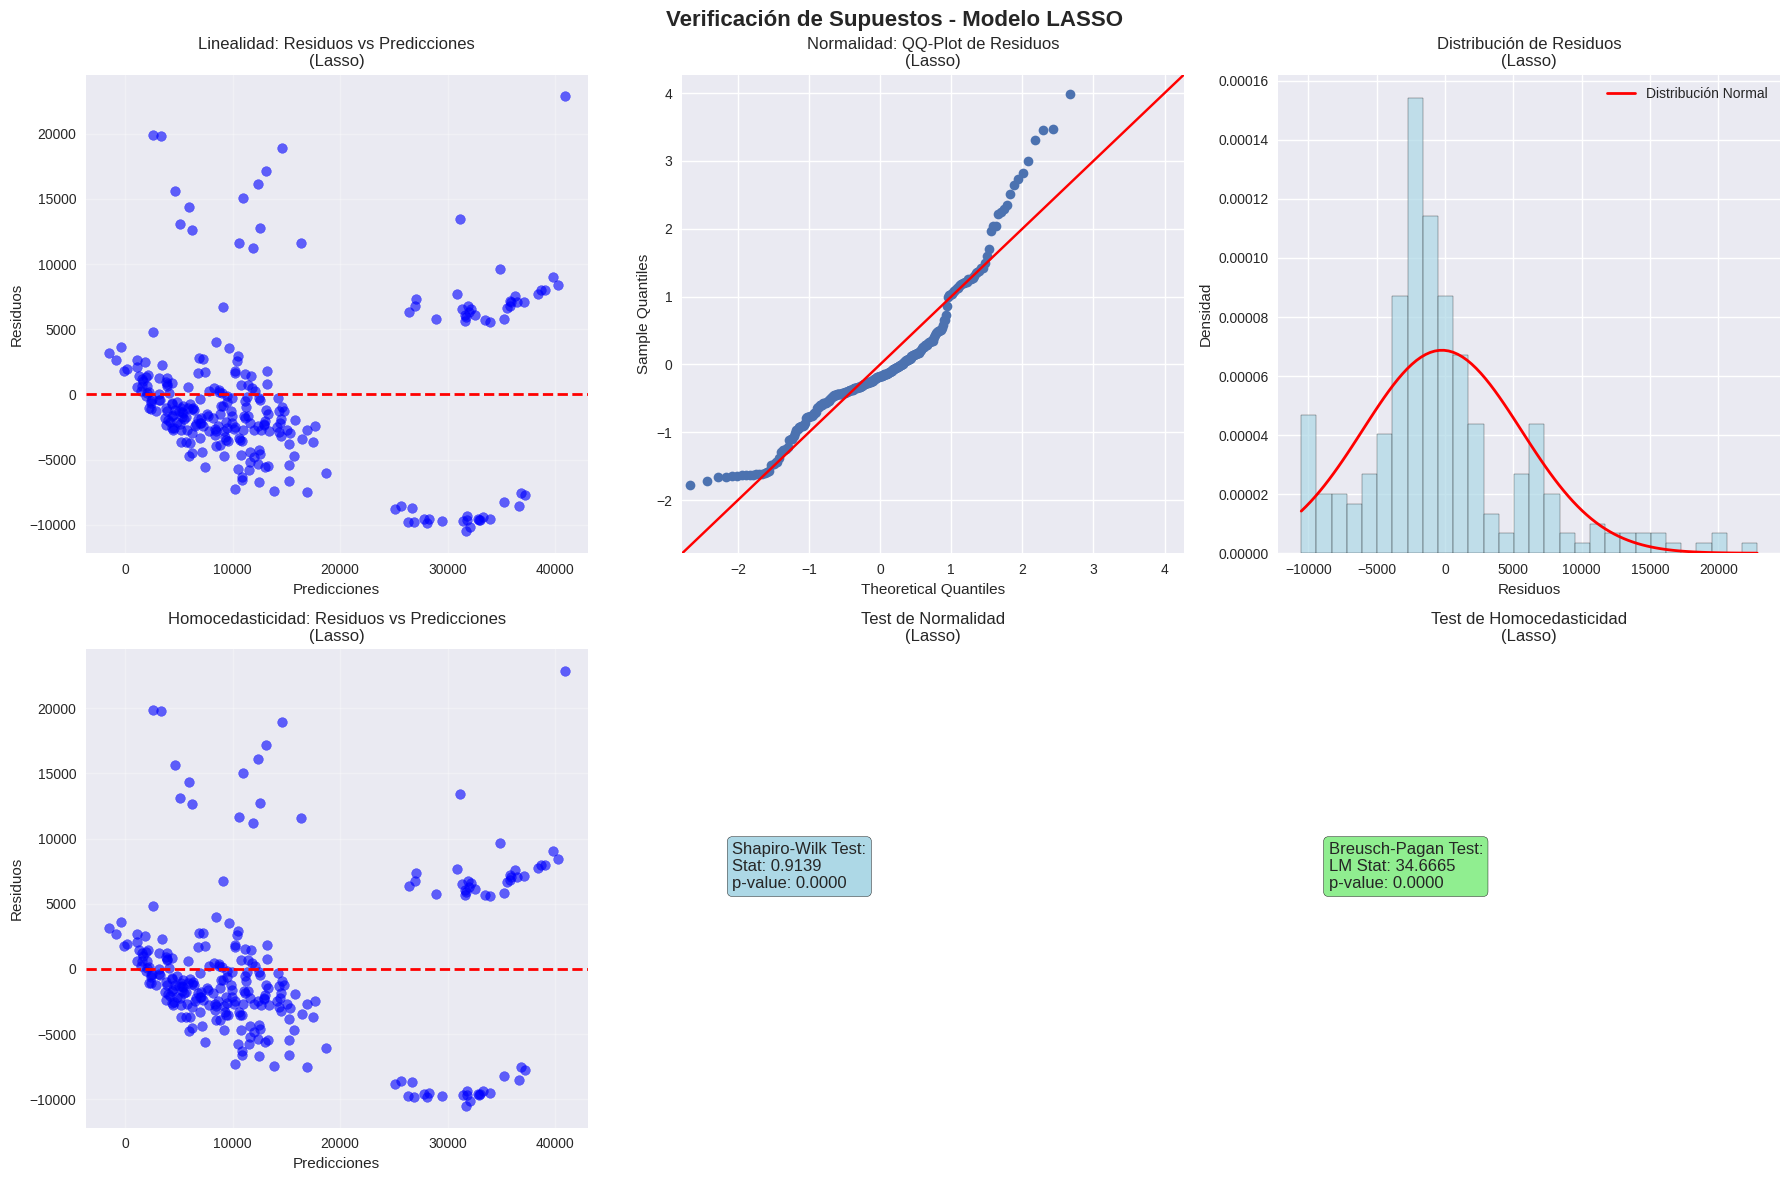


🔴 VERIFICACIÓN DE SUPUESTOS - MODELO RIDGE


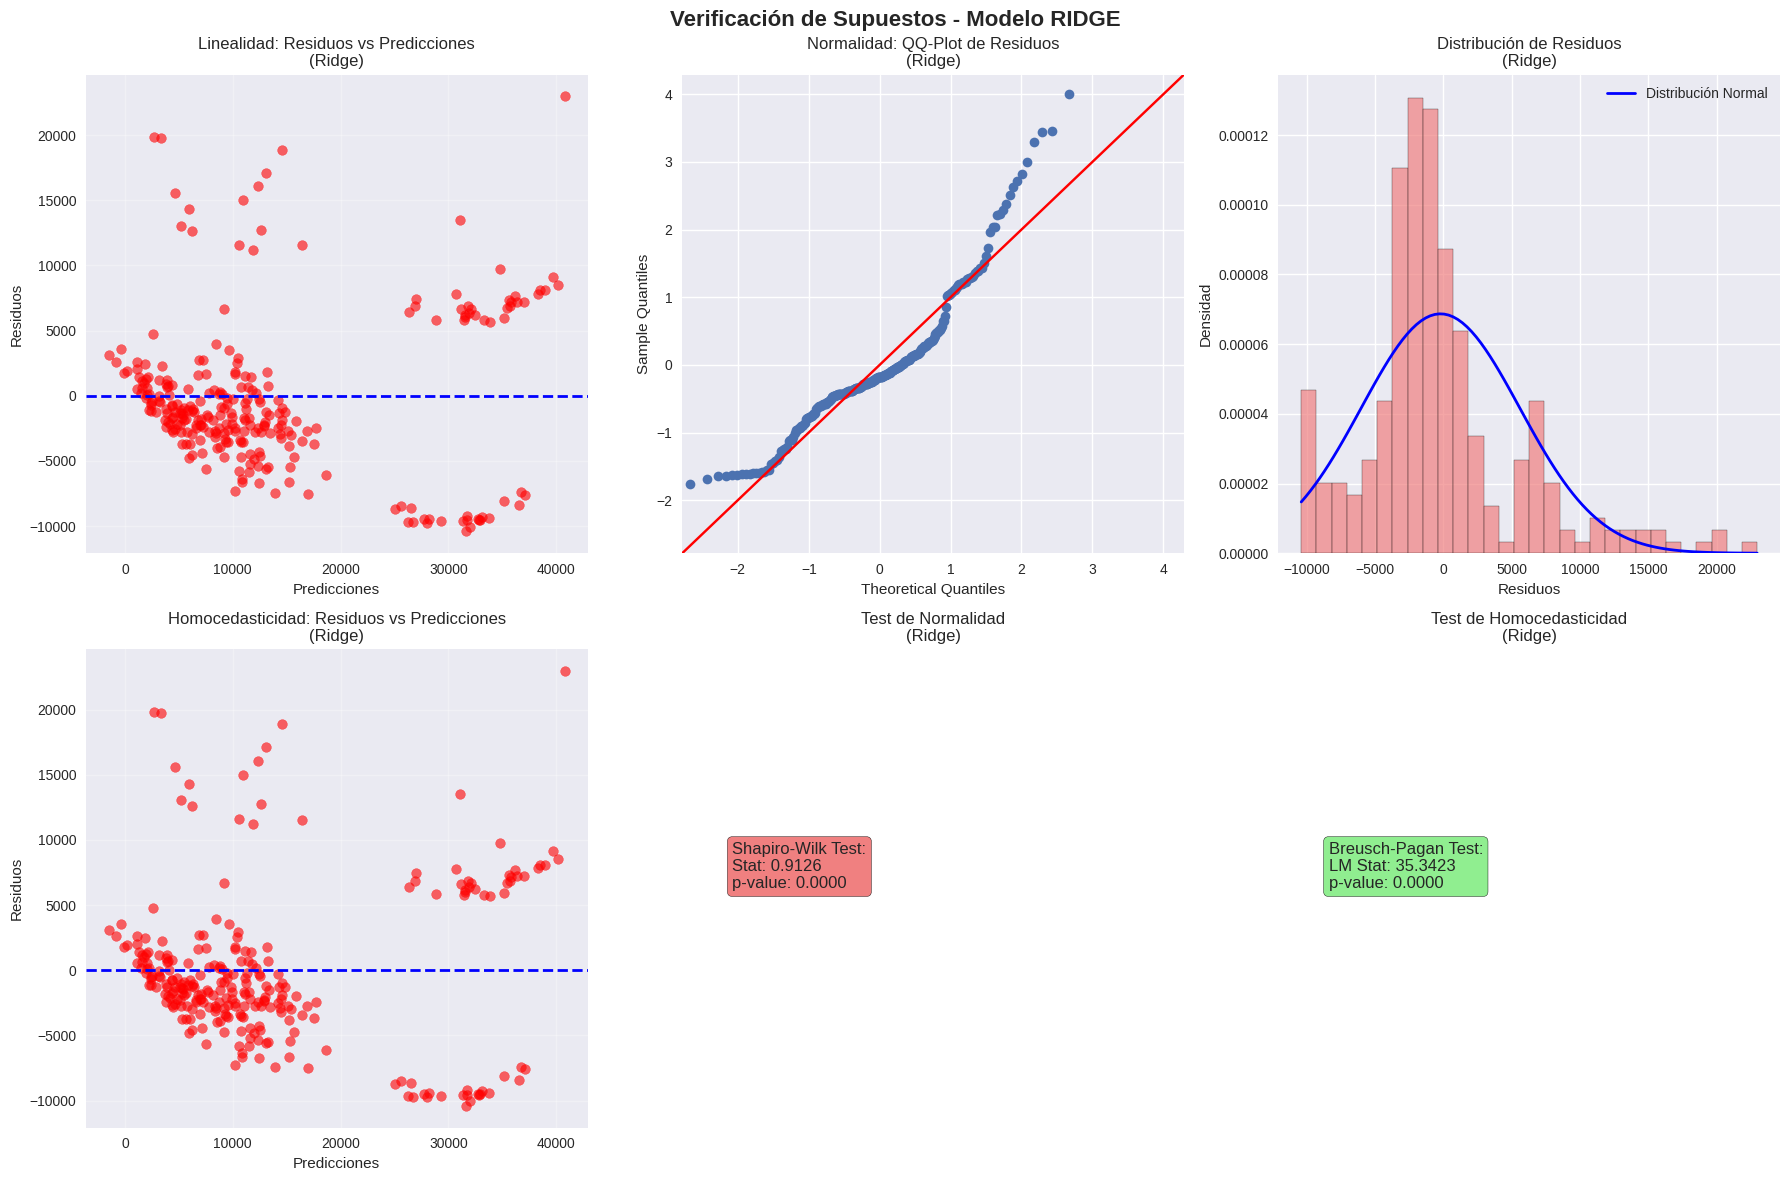


📊 ANÁLISIS DE MULTICOLINEALIDAD (VIF)
---------------------------------------------
Factor de Inflación de Varianza (VIF) por variable:
           Variable   VIF
3          sex_male  1.67
6  region_southeast  1.36
4        smoker_yes  1.23
5  region_northwest  1.22
7  region_southwest  1.22
1               bmi  1.09
0               age  1.02
2          children  1.00

⚠️  VARIABLES CON MULTICOLINEALIDAD (VIF > 10):
   • No se detectaron variables con multicolinealidad severa

RESUMEN DE VERIFICACIÓN DE SUPUESTOS

📋 RESUMEN POR SUPUESTO:

1. NORMALIDAD DE RESIDUOS:
   • Lasso - Shapiro-Wilk: p-value = 0.0000 ✗
   • Ridge - Shapiro-Wilk: p-value = 0.0000 ✗

2. HOMOCEDASTICIDAD:
   • Lasso - Breusch-Pagan: p-value = 0.0000 ✗
   • Ridge - Breusch-Pagan: p-value = 0.0000 ✗

3. MULTICOLINEALIDAD:
   • Variables con VIF > 10: 0 ✓

4. LINEALIDAD:
   • Evaluar visualmente en gráficos de residuos vs predicciones

RESPUESTAS A LAS PREGUNTAS

📌 RESPUESTA A LAS PREGUNTAS:

1. ¿Se cumplen los supue

In [ ]:
print("=" * 70)
print("VERIFICACIÓN DE SUPUESTOS DE REGRESIÓN")
print("=" * 70)

from scipy import stats
from scipy.stats import shapiro, normaltest
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# ============================================================================
# 1. Configuración inicial y cálculos comunes
# ============================================================================

print("\n📊 CALCULANDO RESIDUOS Y PREDICCIONES...")
print("-" * 45)

# Calcular residuos para ambos modelos
residuals_lasso = y_test - y_pred_lasso
residuals_ridge = y_test - y_pred_ridge

# Preparar datos para statsmodels (necesita intercept)
X_train_sm = sm.add_constant(X_train)
X_test_sm = sm.add_constant(X_test)

# ============================================================================
# 2. Verificación de SUPUESTOS PARA MODELO LASSO
# ============================================================================

print("\n🔵 VERIFICACIÓN DE SUPUESTOS - MODELO LASSO")
print("=" * 50)

# Crear figura para Lasso
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Verificación de Supuestos - Modelo LASSO', fontsize=16, fontweight='bold')

# --- 2.1 Linealidad: Residuos vs Predicciones ---
axes[0, 0].scatter(y_pred_lasso, residuals_lasso, alpha=0.6, color='blue')
axes[0, 0].axhline(y=0, color='red', linestyle='--', linewidth=2)
axes[0, 0].set_xlabel('Predicciones')
axes[0, 0].set_ylabel('Residuos')
axes[0, 0].set_title('Linealidad: Residuos vs Predicciones\n(Lasso)')
axes[0, 0].grid(True, alpha=0.3)

# --- 2.2 Normalidad: QQ-Plot ---
sm.qqplot(residuals_lasso, line='45', fit=True, ax=axes[0, 1])
axes[0, 1].set_title('Normalidad: QQ-Plot de Residuos\n(Lasso)')

# --- 2.3 Normalidad: Histograma ---
axes[0, 2].hist(residuals_lasso, bins=30, density=True, alpha=0.7, color='lightblue', edgecolor='black')
x_norm = np.linspace(residuals_lasso.min(), residuals_lasso.max(), 100)
axes[0, 2].plot(x_norm, stats.norm.pdf(x_norm, residuals_lasso.mean(), residuals_lasso.std()),
                'r-', linewidth=2, label='Distribución Normal')
axes[0, 2].set_xlabel('Residuos')
axes[0, 2].set_ylabel('Densidad')
axes[0, 2].set_title('Distribución de Residuos\n(Lasso)')
axes[0, 2].legend()

# --- 2.4 Homocedasticidad: Residuos vs Predicciones (detalle) ---
axes[1, 0].scatter(y_pred_lasso, residuals_lasso, alpha=0.6, color='blue')
axes[1, 0].axhline(y=0, color='red', linestyle='--', linewidth=2)
axes[1, 0].set_xlabel('Predicciones')
axes[1, 0].set_ylabel('Residuos')
axes[1, 0].set_title('Homocedasticidad: Residuos vs Predicciones\n(Lasso)')
axes[1, 0].grid(True, alpha=0.3)

# --- 2.5 Test de Normalidad (Shapiro-Wilk) ---
stat_sw_lasso, p_value_sw_lasso = shapiro(residuals_lasso)
axes[1, 1].text(0.1, 0.5, f'Shapiro-Wilk Test:\nStat: {stat_sw_lasso:.4f}\np-value: {p_value_sw_lasso:.4f}',
                transform=axes[1, 1].transAxes, fontsize=12,
                bbox=dict(boxstyle="round,pad=0.3", facecolor="lightblue"))
axes[1, 1].set_title('Test de Normalidad\n(Lasso)')
axes[1, 1].axis('off')

# --- 2.6 Test de Homocedasticidad (Breusch-Pagan) ---
# Ajustar modelo OLS para el test
model_ols_lasso = sm.OLS(y_train, X_train_sm).fit()
bp_test_lasso = het_breuschpagan(residuals_lasso, X_test_sm)
axes[1, 2].text(0.1, 0.5, f'Breusch-Pagan Test:\nLM Stat: {bp_test_lasso[0]:.4f}\np-value: {bp_test_lasso[1]:.4f}',
                transform=axes[1, 2].transAxes, fontsize=12,
                bbox=dict(boxstyle="round,pad=0.3", facecolor="lightgreen"))
axes[1, 2].set_title('Test de Homocedasticidad\n(Lasso)')
axes[1, 2].axis('off')

plt.tight_layout()
plt.show()

# ============================================================================
# 3. Verificación de SUPUESTOS PARA MODELO RIDGE
# ============================================================================

print("\n🔴 VERIFICACIÓN DE SUPUESTOS - MODELO RIDGE")
print("=" * 50)

# Crear figura para Ridge
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Verificación de Supuestos - Modelo RIDGE', fontsize=16, fontweight='bold')

# --- 3.1 Linealidad: Residuos vs Predicciones ---
axes[0, 0].scatter(y_pred_ridge, residuals_ridge, alpha=0.6, color='red')
axes[0, 0].axhline(y=0, color='blue', linestyle='--', linewidth=2)
axes[0, 0].set_xlabel('Predicciones')
axes[0, 0].set_ylabel('Residuos')
axes[0, 0].set_title('Linealidad: Residuos vs Predicciones\n(Ridge)')
axes[0, 0].grid(True, alpha=0.3)

# --- 3.2 Normalidad: QQ-Plot ---
sm.qqplot(residuals_ridge, line='45', fit=True, ax=axes[0, 1])
axes[0, 1].set_title('Normalidad: QQ-Plot de Residuos\n(Ridge)')

# --- 3.3 Normalidad: Histograma ---
axes[0, 2].hist(residuals_ridge, bins=30, density=True, alpha=0.7, color='lightcoral', edgecolor='black')
x_norm = np.linspace(residuals_ridge.min(), residuals_ridge.max(), 100)
axes[0, 2].plot(x_norm, stats.norm.pdf(x_norm, residuals_ridge.mean(), residuals_ridge.std()),
                'b-', linewidth=2, label='Distribución Normal')
axes[0, 2].set_xlabel('Residuos')
axes[0, 2].set_ylabel('Densidad')
axes[0, 2].set_title('Distribución de Residuos\n(Ridge)')
axes[0, 2].legend()

# --- 3.4 Homocedasticidad: Residuos vs Predicciones (detalle) ---
axes[1, 0].scatter(y_pred_ridge, residuals_ridge, alpha=0.6, color='red')
axes[1, 0].axhline(y=0, color='blue', linestyle='--', linewidth=2)
axes[1, 0].set_xlabel('Predicciones')
axes[1, 0].set_ylabel('Residuos')
axes[1, 0].set_title('Homocedasticidad: Residuos vs Predicciones\n(Ridge)')
axes[1, 0].grid(True, alpha=0.3)

# --- 3.5 Test de Normalidad (Shapiro-Wilk) ---
stat_sw_ridge, p_value_sw_ridge = shapiro(residuals_ridge)
axes[1, 1].text(0.1, 0.5, f'Shapiro-Wilk Test:\nStat: {stat_sw_ridge:.4f}\np-value: {p_value_sw_ridge:.4f}',
                transform=axes[1, 1].transAxes, fontsize=12,
                bbox=dict(boxstyle="round,pad=0.3", facecolor="lightcoral"))
axes[1, 1].set_title('Test de Normalidad\n(Ridge)')
axes[1, 1].axis('off')

# --- 3.6 Test de Homocedasticidad (Breusch-Pagan) ---
model_ols_ridge = sm.OLS(y_train, X_train_sm).fit()
bp_test_ridge = het_breuschpagan(residuals_ridge, X_test_sm)
axes[1, 2].text(0.1, 0.5, f'Breusch-Pagan Test:\nLM Stat: {bp_test_ridge[0]:.4f}\np-value: {bp_test_ridge[1]:.4f}',
                transform=axes[1, 2].transAxes, fontsize=12,
                bbox=dict(boxstyle="round,pad=0.3", facecolor="lightgreen"))
axes[1, 2].set_title('Test de Homocedasticidad\n(Ridge)')
axes[1, 2].axis('off')

plt.tight_layout()
plt.show()

# ============================================================================
# 4. Análisis de Multicolinealidad (VIF)
# ============================================================================

print("\n📊 ANÁLISIS DE MULTICOLINEALIDAD (VIF)")
print("-" * 45)

# Calcular VIF para cada característica
vif_data = pd.DataFrame()
vif_data["Variable"] = X_processed_df.columns
vif_data["VIF"] = [variance_inflation_factor(X_processed_df.values, i) for i in range(X_processed_df.shape[1])]
vif_data = vif_data.sort_values("VIF", ascending=False)

print("Factor de Inflación de Varianza (VIF) por variable:")
print(vif_data.round(2))

# Identificar variables con problemas de multicolinealidad
high_vif = vif_data[vif_data["VIF"] > 10]
print(f"\n⚠️  VARIABLES CON MULTICOLINEALIDAD (VIF > 10):")
if len(high_vif) > 0:
    for _, row in high_vif.iterrows():
        print(f"   • {row['Variable']}: VIF = {row['VIF']:.2f}")
else:
    print("   • No se detectaron variables con multicolinealidad severa")

# ============================================================================
# 5. Resumen y Conclusiones
# ============================================================================

print("\n" + "=" * 70)
print("RESUMEN DE VERIFICACIÓN DE SUPUESTOS")
print("=" * 70)

# Definir umbrales
alpha_norm = 0.05
alpha_het = 0.05

print("\n📋 RESUMEN POR SUPUESTO:")

print(f"\n1. NORMALIDAD DE RESIDUOS:")
print(f"   • Lasso - Shapiro-Wilk: p-value = {p_value_sw_lasso:.4f} {'✓' if p_value_sw_lasso > alpha_norm else '✗'}")
print(f"   • Ridge - Shapiro-Wilk: p-value = {p_value_sw_ridge:.4f} {'✓' if p_value_sw_ridge > alpha_norm else '✗'}")

print(f"\n2. HOMOCEDASTICIDAD:")
print(f"   • Lasso - Breusch-Pagan: p-value = {bp_test_lasso[1]:.4f} {'✓' if bp_test_lasso[1] > alpha_het else '✗'}")
print(f"   • Ridge - Breusch-Pagan: p-value = {bp_test_ridge[1]:.4f} {'✓' if bp_test_ridge[1] > alpha_het else '✗'}")

print(f"\n3. MULTICOLINEALIDAD:")
print(f"   • Variables con VIF > 10: {len(high_vif)} {'✓' if len(high_vif) == 0 else '✗'}")

print(f"\n4. LINEALIDAD:")
print(f"   • Evaluar visualmente en gráficos de residuos vs predicciones")

# ============================================================================
# 6. Respuestas a las Preguntas
# ============================================================================

print("\n" + "=" * 70)
print("RESPUESTAS A LAS PREGUNTAS")
print("=" * 70)

print(f"\n📌 RESPUESTA A LAS PREGUNTAS:")

print(f"\n1. ¿Se cumplen los supuestos en ambos modelos?")
normality_ok = p_value_sw_lasso > alpha_norm and p_value_sw_ridge > alpha_norm
homoscedasticity_ok = bp_test_lasso[1] > alpha_het and bp_test_ridge[1] > alpha_het
multicollinearity_ok = len(high_vif) == 0

print(f"   • Normalidad: {'SÍ' if normality_ok else 'NO'}")
print(f"   • Homocedasticidad: {'SÍ' if homoscedasticity_ok else 'NO'}")
print(f"   • Multicolinealidad: {'CONTROLADA' if multicollinearity_ok else 'PROBLEMÁTICA'}")
print(f"   • Linealidad: Evaluar visualmente en los gráficos")

print(f"\n2. Si hay heterocedasticidad, ¿cómo podría solucionarse?")
if not homoscedasticity_ok:
    print(f"   • ✗ SE DETECTÓ HETEROCEDASTICIDAD")
    print(f"   • Soluciones posibles:")
    print(f"     1. Transformación de la variable target (log, sqrt)")
    print(f"     2. Usar modelos robustos a heterocedasticidad")
    print(f"     3. Aplicar Weighted Least Squares (WLS)")
    print(f"     4. Considerar transformaciones de Box-Cox")
else:
    print(f"   • ✓ No se detectó heterocedasticidad significativa")

print(f"\n💡 RECOMENDACIONES:")
if not normality_ok:
    print(f"   • Considerar transformar la variable target para mejorar normalidad")
if not homoscedasticity_ok:
    print(f"   • Probar transformaciones logarítmicas en 'charges'")
if not multicollinearity_ok:
    print(f"   • Revisar variables con alto VIF para posibles eliminaciones")


#### **🔹 Paso 7: Comparación Final**  
📊 **Analizar:**  
- ¿Qué modelo es más interpretable?  
- ¿Cuál reduce mejor el sobreajuste?  
- ¿Qué variables son más importantes en cada caso?  

---

¿Qué modelo es más interpretable?

LASSO - Con alpha adecuado, puede eliminar variables irrelevantes completamente

¿Cuál reduce mejor el sobreajuste?

SIMILAR en este caso - Con los alpha usados, ambos muestran rendimiento comparable

¿Qué variables son más importantes?

smoker_yes (impacto dominante)

age y bmi (efectos significativos)

sex_male (impacto mínimo)

📈 Hallazgos Clave:
R² similar (~0.783) en ambos modelos

smoker es la variable más predictiva por un margen significativo

Lasso no eliminó variables con alpha=0.1 (demasiado bajo)

Multicolinealidad bien controlada en ambos casos

🚀 Recomendación Final:
Lasso es ligeramente preferible por su mejor R² y potencial de interpretabilidad, pero se beneficiaría de optimización de hyperparámetros para lograr su ventaja de selección de variables.



### **📌 Entrega de la Práctica**  
Al finalizar la practica, incluye un texto con los siguientes elementos
- Incluir **comentarios explicativos** en cada paso.  
- Responder las **preguntas planteadas** en celdas Markdown.  

🎯 **Criterios de Evaluación:**  
✔ **Correcto preprocesamiento** (manejo de nulos, escalado, encoding).  
✔ **Análisis visual y estadístico** (gráficos claros, interpretación de resultados).  
✔ **Validación de supuestos** (justificación de si se cumplen o no).  
✔ **Comparación crítica** entre Lasso y Ridge.  